<a href="https://colab.research.google.com/github/anaazzahra/Minpro5_improving-employee-retention-by-predicting-employee-attrition-using-machine-learning/blob/main/Task_3_improving_employee_retention_by_predicting_employee_attrition_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Connecting to data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load data
df = pd.read_excel('/content/drive/MyDrive/Rakamin Academy/DS JAP/miniproject/minpro 5/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [4]:
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# **Task 1: Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## **Changing Data Type**

In [6]:
df['TanggalResign'] = df['TanggalResign'].replace('-', np.nan) #replace '-' with NaN

In [7]:
#Change 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign' to datetime

from datetime import datetime

date_col = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for col in date_col:
  df[col]=pd.to_datetime(df[col])

In [8]:
#Changing Value of 'PernahBekerja'
df['PernahBekerja'].unique()

array([1, 'yes'], dtype=object)

In [9]:
df['PernahBekerja'] = df['PernahBekerja'].replace({1: 'yes'}) #becausfe of 1 and 'yes' indicates similar meaning, so enough use value 'yes'

In [10]:
print(df['PernahBekerja'].unique())

['yes']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

## **Checking Unique Value Each Column**

In [12]:
unique_value_columns = df.nunique()
single_value_columns = unique_value_columns[unique_value_columns == 1].index.tolist()

In [13]:
print(f"Column with only one unique value: {single_value_columns}")

Column with only one unique value: ['PernahBekerja']


In [14]:
#Drop 'PernahBekerja'
df.drop(['PernahBekerja'], axis=1, inplace=True)

## **Checking Null and Duplicated Data**

In [15]:
#Missing Value
df.isnull().sum()

,0
Username,0
EnterpriseID,0
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0


In [16]:
#Handling missing value
num = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
for column in num:
  median_value = df[column].median()
  df[column].fillna(median_value, inplace = True)

In [17]:
#Categorical Value
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

In [18]:
#deleting 'IkutProgramLOP' because lot of missing value
df.drop(['IkutProgramLOP'], axis=1, inplace=True)

In [19]:
#for column 'TanggalResign'
df['TanggalResign'].fillna(pd.NaT, inplace=True)

In [20]:
df.isnull().sum()

,0
Username,0
EnterpriseID,0
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0


In [21]:
#Duplicated data
df.duplicated().sum()

0

# **Task 2: Annual Report on Employee Number Changes**

## **Creating Table for Total Hiring and Resign**

In [22]:
#Extract date year
df['HiringYear'] = df['TanggalHiring'].dt.year
df['ResignYear'] = df['TanggalResign'].dt.year

In [23]:
#table employee based on year hiring and resign
hiring_table = df.groupby('HiringYear').size().reset_index(name='TotalHiring')
resign_table = df.groupby('ResignYear').size().reset_index(name='TotalResign')

In [24]:
#show calculate
print('Hiring Table:')
print(hiring_table)
print('Resign Table:')
print(resign_table)

Hiring Table:
    HiringYear  TotalHiring
0         2006            1
1         2007            2
2         2008            2
3         2009            7
4         2010            8
5         2011           76
6         2012           41
7         2013           43
8         2014           56
9         2015           31
10        2016           14
11        2017            5
12        2018            1
Resign Table:
   ResignYear  TotalResign
0      2013.0            5
1      2014.0           12
2      2015.0            8
3      2016.0            8
4      2017.0           19
5      2018.0           26
6      2019.0            5
7      2020.0            6


In [25]:
#Joining Table
table_merged = pd.merge(hiring_table, resign_table, left_on= 'HiringYear', right_on= 'ResignYear', how='outer' )

#replace NaN with 0
table_merged.fillna({'TotalHiring': 0, 'TotalResign': 0}, inplace=True)

#setting year
table_merged['HiringYear'] = table_merged['HiringYear'].fillna(table_merged['ResignYear'])

#setting table
table_merged = table_merged[['HiringYear', 'TotalHiring', 'TotalResign']]
table_merged.sort_values(by='HiringYear', inplace=True)
table_merged.rename(columns={'HiringYear': 'Year'}, inplace=True)

#deleting decimal 0
pd.options.display.float_format = '{:.0f}'.format
#
print(table_merged)

    Year  TotalHiring  TotalResign
0   2006            1            0
1   2007            2            0
2   2008            2            0
3   2009            7            0
4   2010            8            0
5   2011           76            0
6   2012           41            0
7   2013           43            5
8   2014           56           12
9   2015           31            8
10  2016           14            8
11  2017            5           19
12  2018            1           26
13  2019            0            5
14  2020            0            6


## **Agregration Total of Employee**

In [26]:
table_merged['Employee'] = table_merged['TotalHiring'].cumsum() - table_merged['TotalResign'].cumsum() #total real employee
table_merged['Change_Count'] = table_merged['TotalHiring'] - table_merged['TotalResign'] #change in total of employee

#
print(table_merged)

    Year  TotalHiring  TotalResign  Employee  Change_Count
0   2006            1            0         1             1
1   2007            2            0         3             2
2   2008            2            0         5             2
3   2009            7            0        12             7
4   2010            8            0        20             8
5   2011           76            0        96            76
6   2012           41            0       137            41
7   2013           43            5       175            38
8   2014           56           12       219            44
9   2015           31            8       242            23
10  2016           14            8       248             6
11  2017            5           19       234           -14
12  2018            1           26       209           -25
13  2019            0            5       204            -5
14  2020            0            6       198            -6


## **Visualization of Employee**

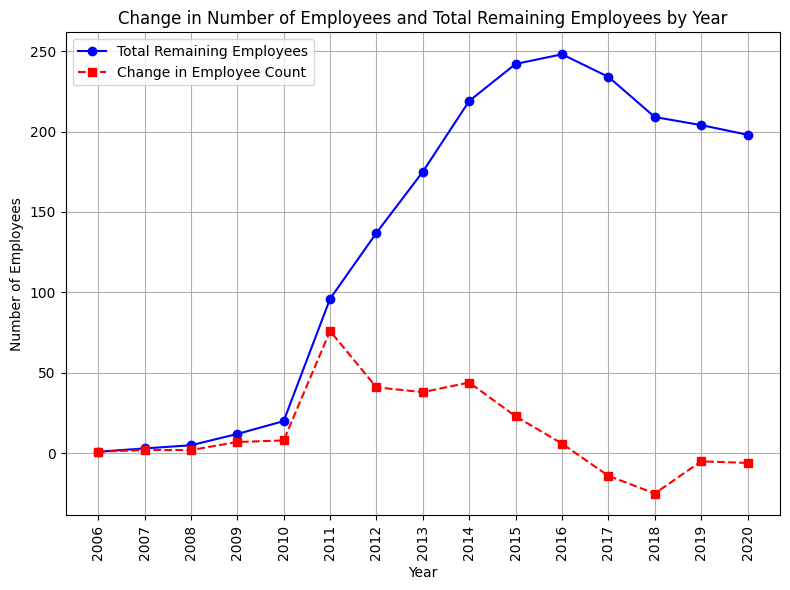

In [27]:
#Initiate Plot
plt.figure(figsize=(8,6)) #size of plot

#plot for employee
plt.plot(table_merged['Year'], table_merged['Employee'], marker='o', linestyle='-', color='b', label='Total Remaining Employees')

#plot for change number of employee
plt.plot(table_merged['Year'], table_merged['Change_Count'], marker='s', linestyle='--', color='r', label='Change in Employee Count')

# Labeling
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Change in Number of Employees and Total Remaining Employees by Year')
plt.legend()
plt.grid(True)
plt.xticks(table_merged['Year'], rotation=90)  # Rotate x-axis labels for better readability

# showing plot
plt.tight_layout()
plt.show()

Interpretation:

From 2010 to 2011, the total of employee increased significantly from 20 people up to 9 workers. Then, in the next several years until 2014, the number of employee rose up to 219. Fluctuations in changes in the number of employees indicate that the company experienced periods of growth and decline, with a peak in employee additions around 2011 and an increase in resignations in subsequent years. In addition, The highest number of employees occurred in 2016 up tp 248.

# **Task 3: Resign Reason Analysis for Employee Attrition Management Strategy**

## Creating Data Frame Based on Resign and Position

In [28]:
#Data Frame Resigned
df_resigned = df[df['TanggalResign'].notna()]
df_remained = df[df['TanggalResign'].isna()]

In [32]:
df_resigned_agg = df_resigned.groupby('Pekerjaan').size().reset_index(name='TotalResigned')
df_remained_agg = df_remained.groupby('Pekerjaan').size().reset_index(name='TotalNotResigned')

In [35]:
#Join data frame based on position or type of work
job_merged = pd.merge(df_resigned_agg, df_remained_agg, on='Pekerjaan', how ='outer')

job_merged.fillna(0, inplace=True)

#Showing Data Frame
print('Data Frame Based on Work:')
print(job_merged)

Data Frame Based on Work:
                         Pekerjaan  TotalResigned  TotalNotResigned
0                     Data Analyst              8                 8
1                    Data Engineer              3                 7
2         Product Design (UI & UX)              9                15
3                  Product Manager              6                11
4      Software Engineer (Android)              7                17
5     Software Engineer (Back End)             28                81
6    Software Engineer (Front End)             28                44
7                  DevOps Engineer              0                 3
8          Digital Product Manager              0                 2
9        Machine Learning Engineer              0                 2
10  Product Design (UX Researcher)              0                 1
11                    Scrum Master              0                 3
12              Software Architect              0                 1
13         Software En

In [39]:
#Adding column
job_merged['TotalEmployee'] = job_merged['TotalResigned'] + job_merged['TotalNotResigned']

# percentage of existing employee
job_merged['PercentageNotResigned'] = (job_merged['TotalNotResigned'] / job_merged['TotalEmployee']) * 100

print('Data Frame After Adding Column and Percentage:')
print(job_merged)

Data Frame After Adding Column and Percentage:
                         Pekerjaan  TotalResigned  TotalNotResigned  \
0                     Data Analyst              8                 8   
1                    Data Engineer              3                 7   
2         Product Design (UI & UX)              9                15   
3                  Product Manager              6                11   
4      Software Engineer (Android)              7                17   
5     Software Engineer (Back End)             28                81   
6    Software Engineer (Front End)             28                44   
7                  DevOps Engineer              0                 3   
8          Digital Product Manager              0                 2   
9        Machine Learning Engineer              0                 2   
10  Product Design (UX Researcher)              0                 1   
11                    Scrum Master              0                 3   
12              Software Archi

## Visualization of Job_Merged

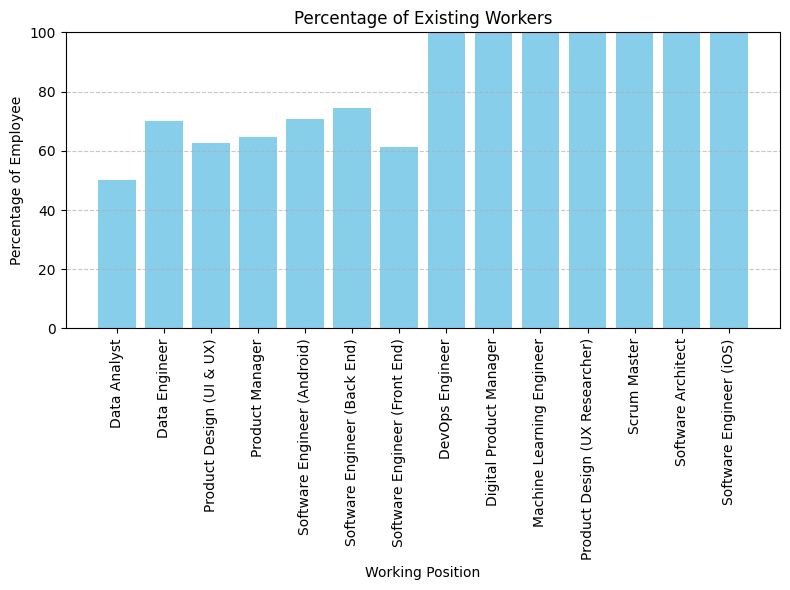

In [43]:
#Initiate Plot
plt.figure(figsize=(8,6))

plt.bar(job_merged['Pekerjaan'], job_merged['PercentageNotResigned'], color='skyblue')
plt.xlabel('Working Position')
plt.ylabel('Percentage of Employee')
plt.title('Percentage of Existing Workers')
plt.xticks(job_merged['Pekerjaan'], rotation=90)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#showing plot
plt.tight_layout()
plt.show()

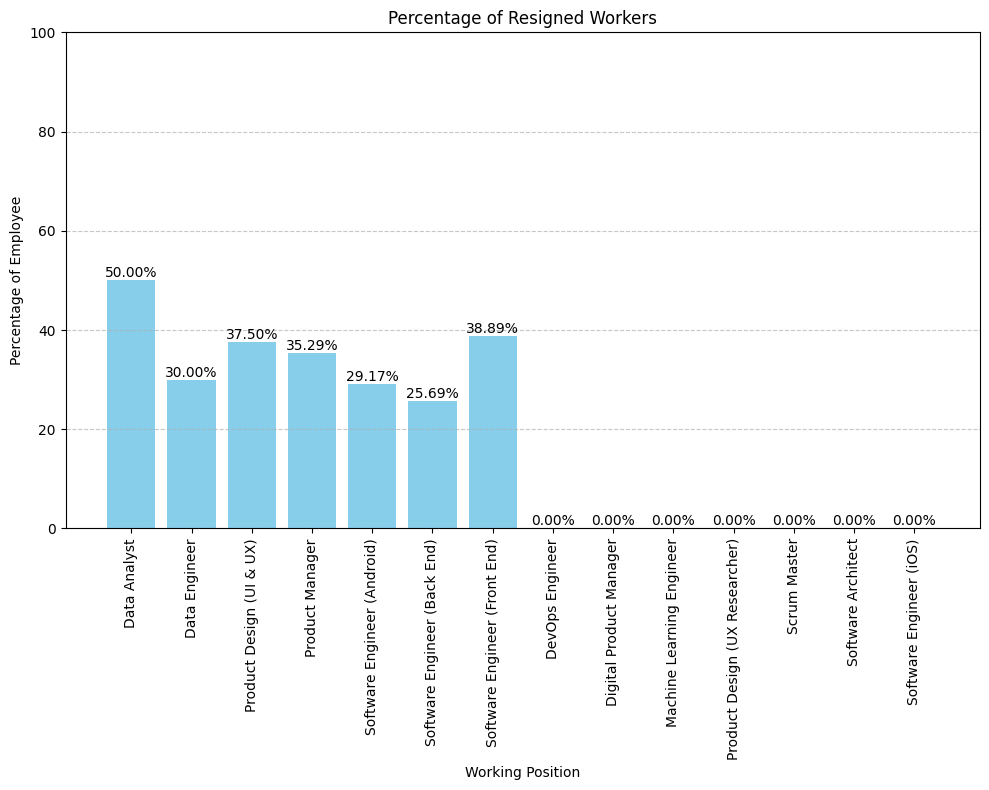

In [57]:
# percentage of resigned employee
job_merged['PercentageResigned'] = (job_merged['TotalResigned'] / job_merged['TotalEmployee']) * 100

#Initiate Plot
plt.figure(figsize=(10,8))
bars = plt.bar(job_merged['Pekerjaan'], job_merged['PercentageResigned'], color='skyblue')

#
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel('Working Position')
plt.ylabel('Percentage of Employee')
plt.title('Percentage of Resigned Workers')
plt.xticks(job_merged['Pekerjaan'], rotation=90)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#showing plot
plt.tight_layout()
plt.show()

## Percentage of Resigned based on 'JenjangKarir', 'PerformancePegawai', and 'AlasanResign'

In [45]:
#based on previous calculating, The highest resignation occurred in the data analyst position
data_analyst_resigned = df[(df['Pekerjaan'] == 'Data Analyst') & (df['TanggalResign'].notna())]
aggregated_analyst = data_analyst_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')
print(aggregated_analyst)

            JenjangKarir PerformancePegawai       AlasanResign  JumlahResign
0  Freshgraduate_program              Bagus      toxic_culture             1
1  Freshgraduate_program              Biasa  internal_conflict             1
2  Freshgraduate_program              Biasa      toxic_culture             1
3  Freshgraduate_program       Sangat_bagus  internal_conflict             1
4  Freshgraduate_program       Sangat_bagus      toxic_culture             3
5  Freshgraduate_program      Sangat_kurang      toxic_culture             1


## Visualization For Hihghest Resigned

In [46]:
import plotly.express as px

In [50]:
# Membuat Sunburst plot
fig = px.sunburst(
    aggregated_analyst,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
    values='JumlahResign',
    title='Sunburst Plot of Data Analyst Resignations',
    color='JumlahResign'
)

# Menampilkan plot
fig.show()

Interpretation:

**Career path**:

All employees who resigned came from the fresh graduate program.

**Employee Performance**:

Employees who had performance ratings ranging from very good to very poor all resigned, showing that the problem is not limited to employees with poor performance.

**Reason for Resigning**:

*Toxic Culture*: Most employees mention 'toxic culture' as the reason they resign. This shows that an unhealthy work environment greatly influences their decision to leave.

*Internal Conflict*: Internal conflict is also an important reason, although not as much as toxic culture.

Recommendation:

**Work Environment Improvements**:

*Identify and Eliminate Toxic Elements*: Management needs to identify what makes the work environment toxic. This could be bad boss behavior, an unhealthy work culture, or unfair policies. Once identified, steps must be taken to remove or repair the elements.

*Management Training*: Conduct training for managers and supervisors on how to create a positive and supportive work environment.

**Internal Conflict Resolution**:

*Facilitate Communication and Mediators*: Ensure there are open lines of communication between employees and management to discuss and resolve conflicts before they escalate.



Freshgraduate Development Program:

*Mentorship Programs*: Implementing a mentorship program to help fresh graduates adapt to the work environment and company culture.
Feedback Sessions: Hold regular feedback sessions to understand the problems faced by fresh graduates and deal with them immediately.

**Employee Engagement**:

*Employee Engagement Surveys*: Conduct regular employee satisfaction surveys to measure satisfaction levels and identify areas that need improvement.
Focus Groups: Hold focus groups with employees from various career levels to gain deeper insight into the problems they face.

In [52]:
aggregated_results = pd.DataFrame()

for pekerjaan in df['Pekerjaan'].unique():
    resigned = df[(df['Pekerjaan'] == pekerjaan) & (df['TanggalResign'].notna())]
    aggregated_data_resigned = resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')
    aggregated_data_resigned['Pekerjaan'] = pekerjaan
    aggregated_results = pd.concat([aggregated_results, aggregated_data_resigned], ignore_index=True)

print(aggregated_results)


             JenjangKarir PerformancePegawai     AlasanResign  JumlahResign  \
0   Freshgraduate_program              Bagus  kejelasan_karir             1   
1   Freshgraduate_program              Bagus    toxic_culture             1   
2   Freshgraduate_program              Biasa      ganti_karir             2   
3   Freshgraduate_program              Biasa        jam_kerja             1   
4   Freshgraduate_program              Biasa  kejelasan_karir             1   
..                    ...                ...              ...           ...   
73              Mid_level              Biasa        jam_kerja             1   
74           Senior_level              Bagus    tidak_bahagia             1   
75  Freshgraduate_program       Sangat_bagus        apresiasi             1   
76  Freshgraduate_program      Sangat_kurang        jam_kerja             1   
77              Mid_level       Sangat_bagus  kejelasan_karir             1   

                       Pekerjaan  
0   Software Eng

## Visualization for All Work Types

In [53]:
# Membuat Sunburst plot untuk setiap pekerjaan
for pekerjaan in aggregated_results['Pekerjaan'].unique():
    data_pekerjaan = aggregated_results[aggregated_results['Pekerjaan'] == pekerjaan]

    fig = px.sunburst(
        data_pekerjaan,
        path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
        values='JumlahResign',
        title=f'Sunburst Plot of {pekerjaan} Resignations',
        color='JumlahResign',
        color_discrete_sequence=px.colors.sequential.Blues
    )

    fig.show()
